# No-show appointments

# 1 - Introdution

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

| Column | Description |Observation |
|:--- |:--- |:--- | 
|Patient | Identification of a patient |
|Appointment | Identification of appointment |
|Gender |Female or Male |
|ScheduledDay |Day scheduled for the consultation |
|AppointmetDay |Day of visit to the place of care for consultation |
|Age |How old is the patient |
|Neighbourhood |Consultation location |
|Scholarship |Scholarship of patient |True or False (0,1) |
|Hipertension |Patient has blood pressure |True or False (0,1) |
|Diabetes |Patient has Diabetes |True or False (0,1) |
|Alcoholism |Patient is dependent on alcohol |True or False (0,1) |
|Handcap |Patient has some restriction |True or False (0,1) |
|SMS_Received |Patient received message regarding consultation |True or False (0,1) |
|No-show |Patient attended the appointment or not | Yes or No |




# 2 - Questions for Analysis

Q1 - Correlation between missing the appointment and the age o patient.

Q2 - Correlation between missing the appointment and the Gender of the patient.

Q3 - Correlation between missing the appointment and the received the SMS.

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 3 - Data Wrangling

In [114]:
df_01 = pd.read_csv('C:\\Users\\Adm\\OneDrive\\Documentos\\Udacity\\Projeto_2\\!02282023\\2. Prepared Data\\noshowappointments-kagglev2-may-2016 (1).csv')

In [115]:
df_01.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Columns type

In [116]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [117]:
# Convert ScheduleDay = datetime
df_01.ScheduledDay = pd.to_datetime(df_01.ScheduledDay)
df_01.AppointmentDay = pd.to_datetime(df_01.AppointmentDay)

In [118]:
df_01.ScheduledDay.head(2)

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [119]:
df_01.AppointmentDay.head(2)

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

In [120]:
# correct name column (ID = Id)
df_01.rename(columns={"AppointmentID": "AppointmentId"},inplace=True)

In [121]:
# correct name column (No-show to No_show)
df_01.rename(columns={"No-show": "No_show"},inplace=True)

In [122]:
# convert PatientId, AppointmentId column to int
df_01['PatientId'] = df_01['PatientId'].astype('int64')
df_01['AppointmentId'] = df_01['AppointmentId'].astype('int64')

In [126]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentId   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

In [127]:
df_01.shape

(110527, 14)

# Data Cleaning

# Missing values in the dataset


In [128]:
df_01.isnull().sum()

PatientId         0
AppointmentId     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

In [129]:
# checking duplicates in IDs
df_01.duplicated(["PatientId", "AppointmentId"]).sum()

0

No missing values

In [130]:
df_01.describe()

,PatientId,AppointmentId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Incorrect Values

C- Checked that there are one possible error: Age min = -1

In [131]:
df_01.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [132]:
# Drop value (-1)
df_01.drop(df_01.query("Age == -1").index, inplace=True)

In [133]:
df_01.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

Value (-1) = drop

In [134]:
df_01.shape

(110526, 14)

# Analyzing Gender

In [135]:
df_01['Gender'].value_counts('F')

F    0.649974
M    0.350026
Name: Gender, dtype: float64

# Gender count

<AxesSubplot:title={'center':'Gender Count'}, xlabel='Gender', ylabel='Count'>

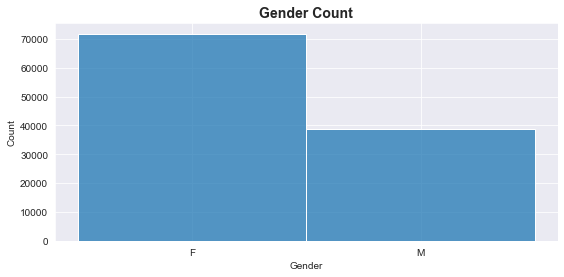

In [136]:
plt.figure(figsize=(9,4))
plt.title('Gender Count', fontsize = 14, weight = "bold")
sns.histplot(data=df_01, x='Gender', binwidth=5)

# Gender Percentage

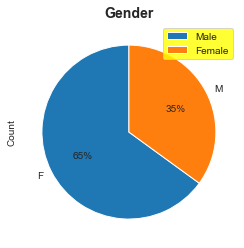

In [96]:
df_01['Gender'].value_counts().plot(kind="pie", autopct='%1.0f%%', startangle=90)
plt.ylabel('Count')
plt.legend(['Male', 'Female'], loc="upper right", facecolor='yellow')
plt.title('Gender', fontsize = 14, weight = "bold");

# Analyzing ScheduledDay e AppointmentDay

In [97]:
df_01[['ScheduledDay','AppointmentDay']].describe()

C:\Users\Adm\AppData\Local\Temp\ipykernel_1296\1977677077.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_01[['ScheduledDay','AppointmentDay']].describe()
C:\Users\Adm\AppData\Local\Temp\ipykernel_1296\1977677077.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_01[['ScheduledDay','AppointmentDay']].describe()


,ScheduledDay,AppointmentDay
count,110526,110526
unique,103548,27
top,2016-05-06 07:09:54+00:00,2016-06-06 00:00:00+00:00
freq,24,4691
first,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00
last,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00


In [98]:
df_01.ScheduledDay.dt.date.value_counts().count(), df_01.ScheduledDay.dt.date.value_counts().count()


(111, 111)

In [99]:
df_01.AppointmentDay.dt.date.value_counts().count(), df_01.AppointmentDay.dt.date.value_counts().count()

(27, 27)

#  ScheduledDay count

Text(0.5, 1.0, "'ScheduledDay' Histogram")

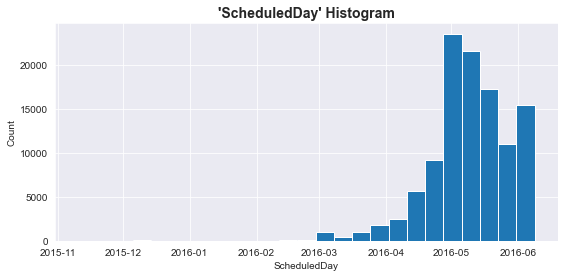

In [100]:
df_01.ScheduledDay.hist(bins=25, figsize=(9,4));
plt.xlabel('ScheduledDay')
plt.ylabel('Count')
plt.title("'ScheduledDay' Histogram", fontsize = 14, weight = "bold")

# AppointmentDay count

Text(0.5, 1.0, "'AppointmentDay' Histogram")

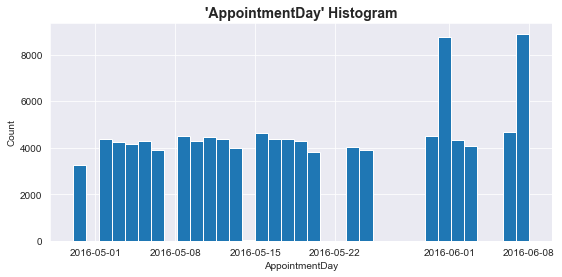

In [101]:
df_01.AppointmentDay.hist(bins=35, figsize=(9,4));
plt.xlabel('AppointmentDay')
plt.ylabel('Count')
plt.title("'AppointmentDay' Histogram", fontsize = 14, weight = "bold")

# Analyzing Age

# Plot Age Histogram

# Analyzing Neighbourhood

In [39]:
df_01.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

# Neighbourhood shows or not show

In [40]:
no_show=df_01.query('No_show=="Yes"')
show=df_01.query('No_show=="No"')

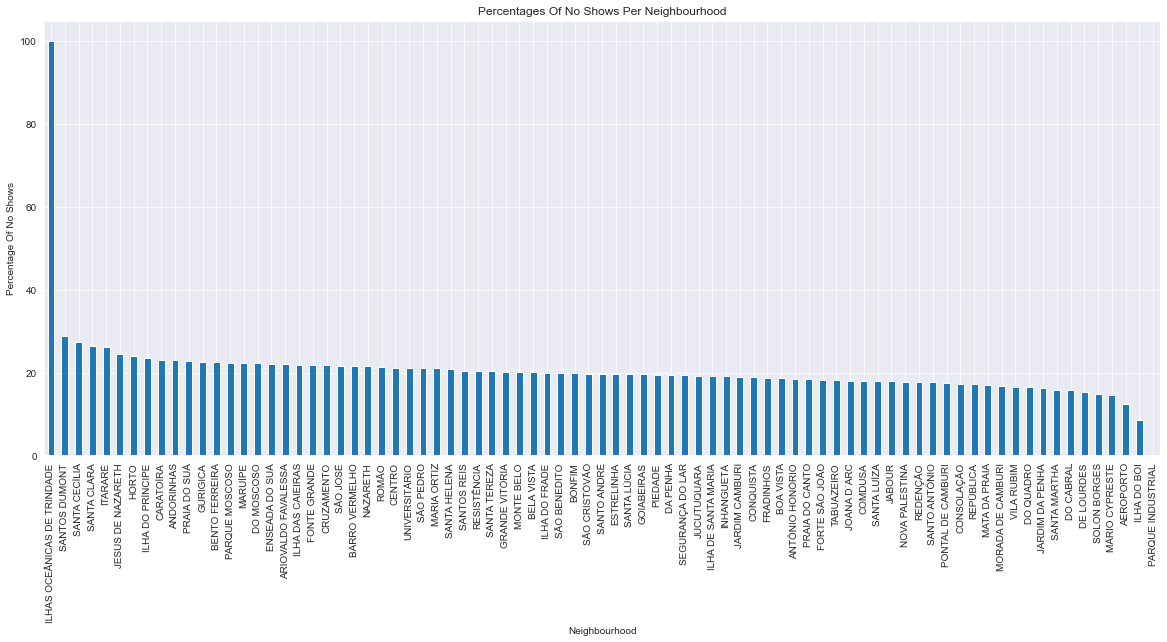

In [42]:
# Investigating neighbourhoods exclusively in regards to show or no shows
hoods_no_show = no_show.groupby(['Neighbourhood']).count()['No_show']
hoods = df_01.groupby(['Neighbourhood']).count()['No_show']
hoods_show = show.groupby(['Neighbourhood']).count()['No_show']

percentages_no_show = hoods_no_show/hoods*100
percentages_no_show.sort_values()

# Plotting percentages of no_shows per neighbourhood
percentages_no_show.sort_values(ascending=False).plot(kind='bar', title='Percentages of No shows per Neighbourhood'.title(), figsize=(20,8));
plt.ylabel('Percentage of no_shows'.title().replace("_"," "))
plt.xlabel('Neighbourhood'.title());

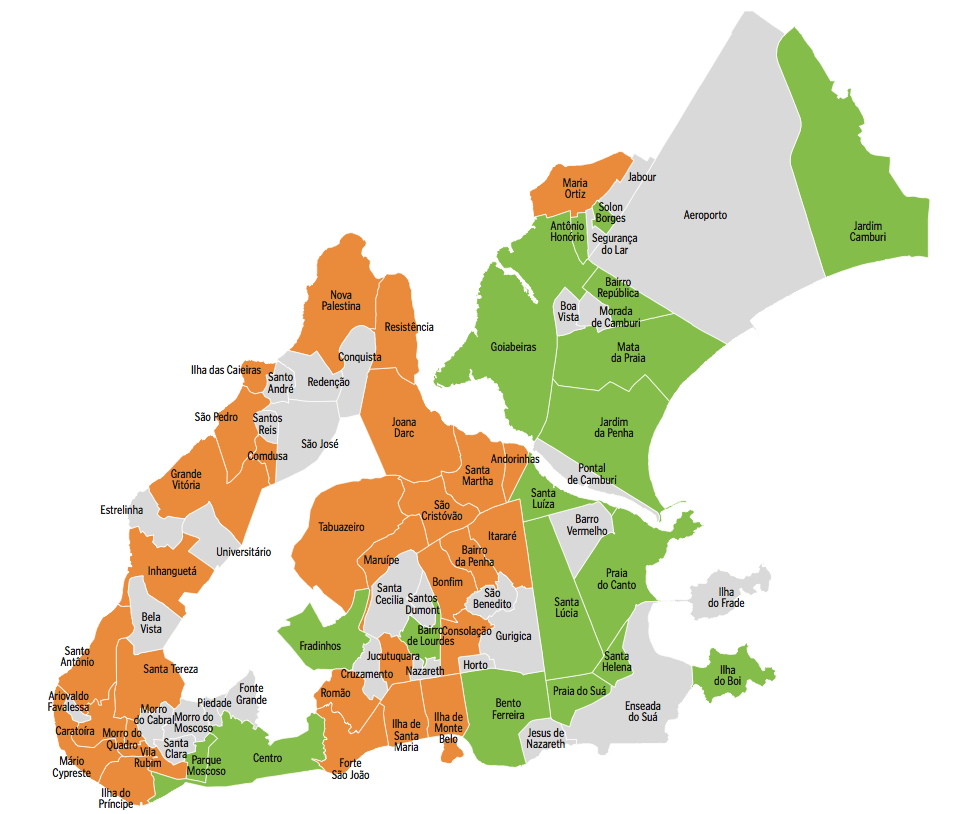

In [149]:
from IPython import display
# Ilha de Vitória - Capital do Espirito Santo - Brasil
display.Image('http://s2.glbimg.com/v8UTudxqCX_RB2QAnJw3waw-etU=/s.glbimg.com/jo/g1/f/original/2016/10/03/captura_de_tela_2016-10-03_as_08.16.21.png')

In [43]:
# Create a function to find the % variables
def value_counts(col):
    sns.set_style("darkgrid")
    print(round(df_01[col].value_counts()/len(df_01)*100))
    df_01[col].hist(bins=35, figsize=(9,4))
    df_01[col].value_counts().plot(kind='bar')
    plt.title(col.title(), fontsize = 14, weight = "bold")
    plt.ylabel('Count')
    plt.legend(facecolor='yellow')
    plt.xlabel(col);

# Counts Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS received, No Show

0    90.0
1    10.0
Name: Scholarship, dtype: float64


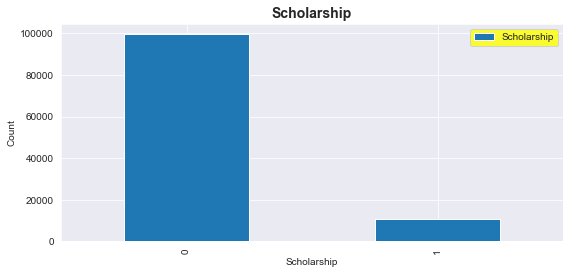

In [42]:
value_counts('Scholarship')

0    80.0
1    20.0
Name: Hipertension, dtype: float64


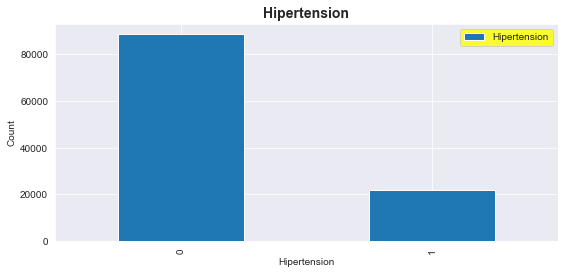

In [43]:
value_counts('Hipertension')

0    93.0
1     7.0
Name: Diabetes, dtype: float64


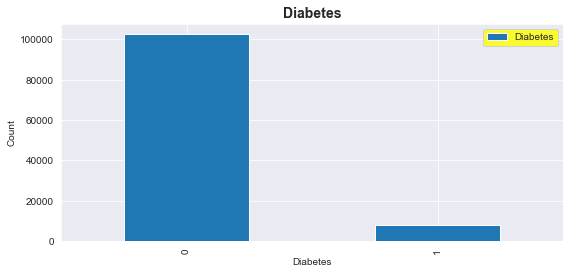

In [44]:
value_counts('Diabetes')

0    97.0
1     3.0
Name: Alcoholism, dtype: float64


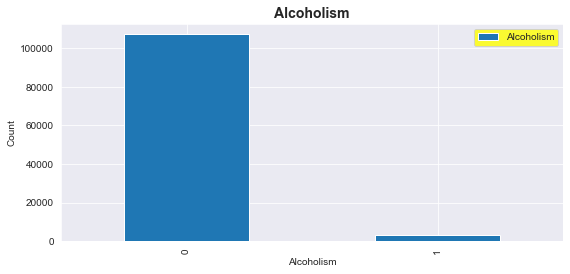

In [45]:
value_counts('Alcoholism')

0    98.0
1     2.0
2     0.0
3     0.0
4     0.0
Name: Handcap, dtype: float64


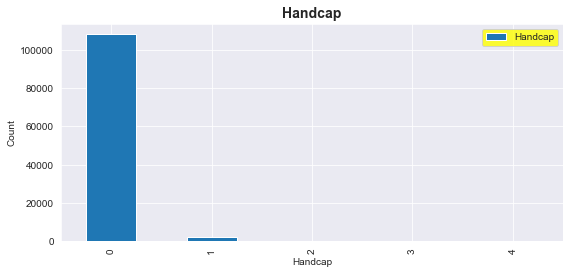

In [46]:
value_counts('Handcap')

0    68.0
1    32.0
Name: SMS_received, dtype: float64


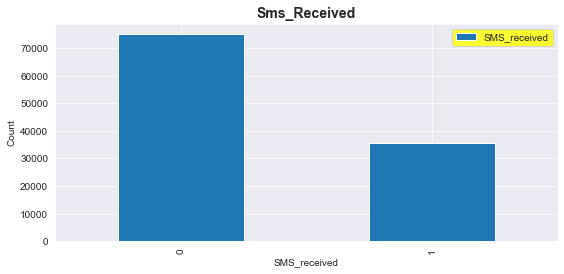

In [47]:
value_counts('SMS_received')

0    80.0
1    20.0
Name: No_show, dtype: float64


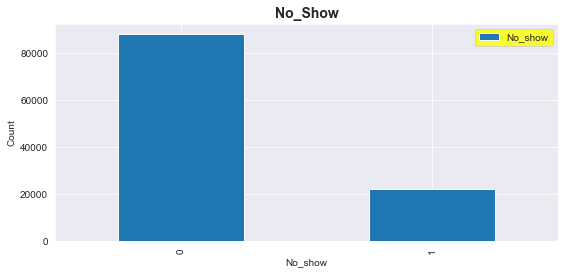

In [49]:
value_counts('No_show')

# Results

* We have a majority of Female, around 65% of the total are women;

* ScheduledDay = 2016-05-06 to 2016-06-08; AppointmentDay 2016-04-29 to 2016-06-08;

* Patients are aged between 0 and 115, we have a balance between patients from 0 to 60 in consultations;

* There are 81 service locations (neighbourhood), they are located in Grande Vitória (display.Image[89];

* Most patients did not have schorlarship, 90% (it would be necessary to verify this information, as it seems to be wrong);

* 19% of patients have hypertension, 7% Diabetes, 3% alcoholism;

* 2% reported having a disability (handcap).

* 32% received SMS and 80% attended the appointment.

# Results

# Q1 - Correlation between missing the appointment and the age o patient

In [163]:
# Create bins for age groups based on percentiles
bin_edges = [0, 18, 37, 55 ,115]
bin_names = ['child', 'working_age', 'mid_age', 'old_age']
df_01['Age'] = pd.cut(df_01.Age, bin_edges, labels=bin_names)

# Proportion of Patients who do not show by Age group

Text(0.5, 1.0, 'Proportion of Patients who do not show by Age Group')

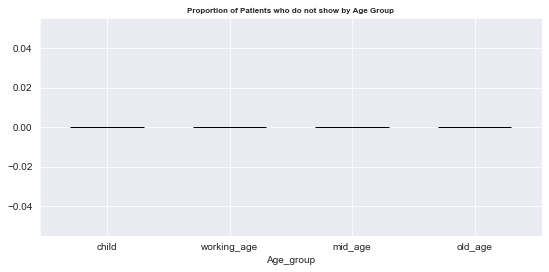

In [164]:
df_01.groupby(['Age'])['No_show'].mean().plot.bar(edgecolor='black', figsize=(9,4), rot=0, width=0.6)
plt.title("Proportion of Patients who do not show by Age Group", fontsize = 8, weight = "bold")

In [138]:
def myGroPlot(df_01, grpVar, yVar=None, color='steelblue',title=None, ylabel=None, rotation=None, figsize=(14,6), alpha=0.7):
    '''base function for groupby plotting of dependent variables to no_show column'''
    # plotting
    df_01.groupby([grpVar])[yVar].mean().plot.bar(edgecolor='black', figsize=figsize, rot=0, width=0.6, color=color, alpha=alpha)
    plt.title(f' {yVar} by {grpVar}'.title(), fontsize = 14, weight = "bold")
    plt.xlabel(f'{grpVar}'.title(), fontsize =10, weight = "bold")
    plt.ylabel(f'{yVar} in Percentages'.title(), fontsize = 8, weight='bold')
    plt.xticks(rotation=rotation)
    plt.grid(axis='y')

In [139]:
# 5. Convert no_show column from yes/no to 1/0
df_01.No_show = df_01.No_show.map(dict(Yes=1, No=0))

# No Show by Gender

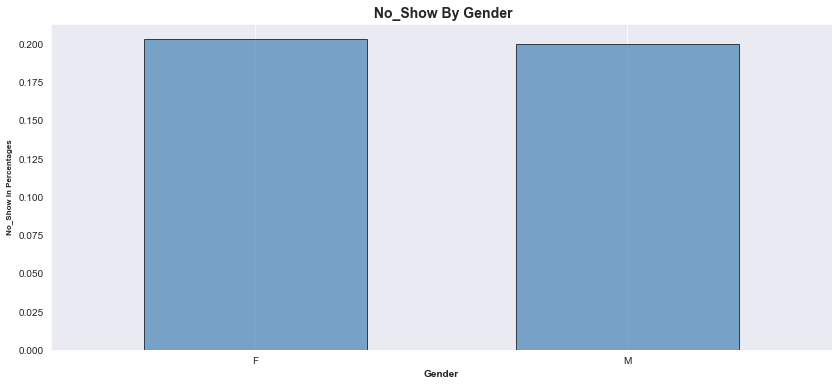

In [140]:
myGroPlot(df_01, 'Gender', 'No_show')

In [154]:
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120]
df_01["Age_bin10"] = pd.cut(df_01.Age, bins=bins)
Age10_count = df_01.groupby('Age_bin10')["No_show"].value_counts()

In [155]:
Age10_count

Age_bin10   No_show
(0, 10]     0          12061
            1           3149
(10, 20]    0           9791
            1           3308
(20, 30]    0          10389
            1           3394
(30, 40]    0          11820
            1           3232
(40, 50]    0          11550
            1           2870
(50, 60]    0          12940
            1           2721
(60, 70]    0           9541
            1           1648
(70, 80]    0           4832
            1            889
(80, 90]    0           2137
            1            407
(90, 100]   0            242
            1             59
(100, 110]  0              2
(110, 120]  1              3
            0              2
Name: No_show, dtype: int64

Text(0.5, 1.0, 'Percentagem of missing across ages')

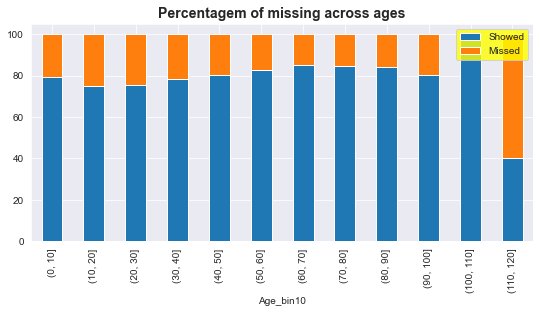

In [156]:
# https://pandas.pydata.org/docs/user_guide/reshaping.html (stacked/unstack)
sns.set_style("darkgrid")
(Age10_count/Age10_count.groupby(level=0).sum()*100).unstack().plot(kind='bar', stacked=True, figsize=(9,4))
plt.legend(["Showed", "Missed"], facecolor='yellow');
plt.title("Percentagem of missing across ages", fontsize = 14, weight = "bold")

# Q1 - Avaliation

* Low correlation between age and no show appointment, the average of absences between all ages is on average 20%;

* Verified by the chart that in the range from 0 to 10 years old and between 50 and 90 years old we have the tracks with the highest attendance.

# Q2 - Correlation between missing the appointment and the Gender of the patient¶

In [53]:
Gender_count = df_01.groupby('Gender')['No_show'].value_counts()
print(Gender_count)

Gender  No_show
F       0          57246
        1          14594
M       0          30962
        1           7725
Name: No_show, dtype: int64


# Plot % Males and Females

% percentage of females/missing appointment: 0 2
% percentage of males/missing appointment: 0 2


Text(0.5, 1.0, '% Males and Females')

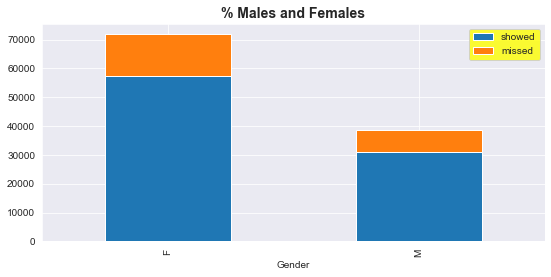

In [61]:
sns.set_style("darkgrid")
print('% percentage of females/missing appointment:', round(Gender_count[1]/Gender_count[0]
/+Gender_count[1])*100,2)

print('% percentage of males/missing appointment:', round(Gender_count[3]/Gender_count[3]
/+Gender_count[2])*100,2)

df_01.groupby('Gender')['No_show'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(9,4))

plt.legend(['showed', 'missed'], facecolor='yellow');
plt.title('% Males and Females', fontsize = 14, weight = "bold")

# Q2 - Avaliation

In [ ]:
* Low correlation between age and no show appointment, the average of absences between all ages is on average 20%;

* Verified by the chart that in the range from 0 to 10 years old and between 50 and 90 years old we have the tracks with the highest attendance.

# Q3 - Correlation between missing the appointment and the received the SMS?

# Plot SMS_received

Text(0.5, 1.0, 'SMS_received')

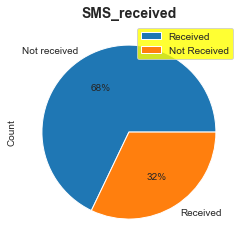

In [56]:
df_01['SMS_received'].value_counts().plot(kind='pie', labels=['Not received', 'Received'], 
     autopct='%1.0f%%')

plt.ylabel('Count')
plt.legend(['Received', 'Not Received'], loc="upper right", facecolor='yellow')
plt.title('SMS_received', fontsize = 14, weight = "bold")

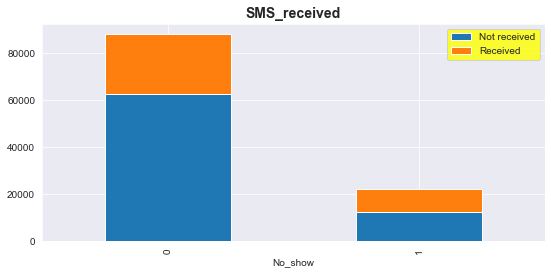

In [58]:
sns.set_style("darkgrid")
df_01.groupby('No_show')['SMS_received'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(9,4))
plt.title('SMS_received', fontsize = 14, weight = "bold")
plt.legend(['Not received', 'Received'], facecolor='yellow');

In [175]:
SMS = (df_01.groupby('No-show')['SMS_received'].value_counts()/(df_01.groupby('No-show')
      ['SMS_received'].value_counts().groupby(level=0).sum()/100)).unstack() 
SMS.columns = ["Not received", "Received"]
SMS

,Not received,Received
No-show,,
No,70.866258,29.133742
Yes,56.162911,43.837089


# Q3 - Avaliation

* Low correlation between SMS and appointment attendance;

* Most did not receive the SMS 68%;

* Already of those who received 43.83% attended;

* Even without receiving the SMS, 56.16% of the people attended.

# 5 -  Conclusion

Conclusions of the analyzes follow:

* Between 0 and 80 years of age attendance at appointments is very similar, being slightly higher in the 10 to 30 and 60 to 80 age ranges;
* There is a low correlation between gender and attendance, female and male have the same attendance rate;
* The correlation between attendance and receiving the SMS is also low, in addition to having a large number of patients who do not receive the message;

# 6 - Limitations

* Despite the amount of data, their period is short;
* More information about ScheduleDay is missing, how this first contact was made (in person, telephone, e-mail, SMS, etc.), this information could add greater value to the dataset;
* Other data tend to be a little superficial and prevent further analysis;